# Project #5 Supervised Machine Learning

Project Description:

This project is in supervised ML classification, where several models are evaluated and hypertuned to as accurately predict heart failures. The project practices on workflow using machine learning models (including data cleaning, preprocessing, test/train split, gridsearching, hyperparameter evaluation, final evaluation). The work is done through scikit learn libraries. 

This project uses supervised ML classification models to answer the following questions:
- Can we predict Heart Failures accurately with classification machine learning?
- How can we minimize the risk that we miss potential high risk heart attack patients (recall)?
- How do we reduce costs of early warning (reduce features needed)?


https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec10

Table of Contents:
1) Import Data and Libraries
2) EDA/Inspect and Clean Data
3) Test Classification Models
4) Tuning the Best Model
5) Final Evaluation

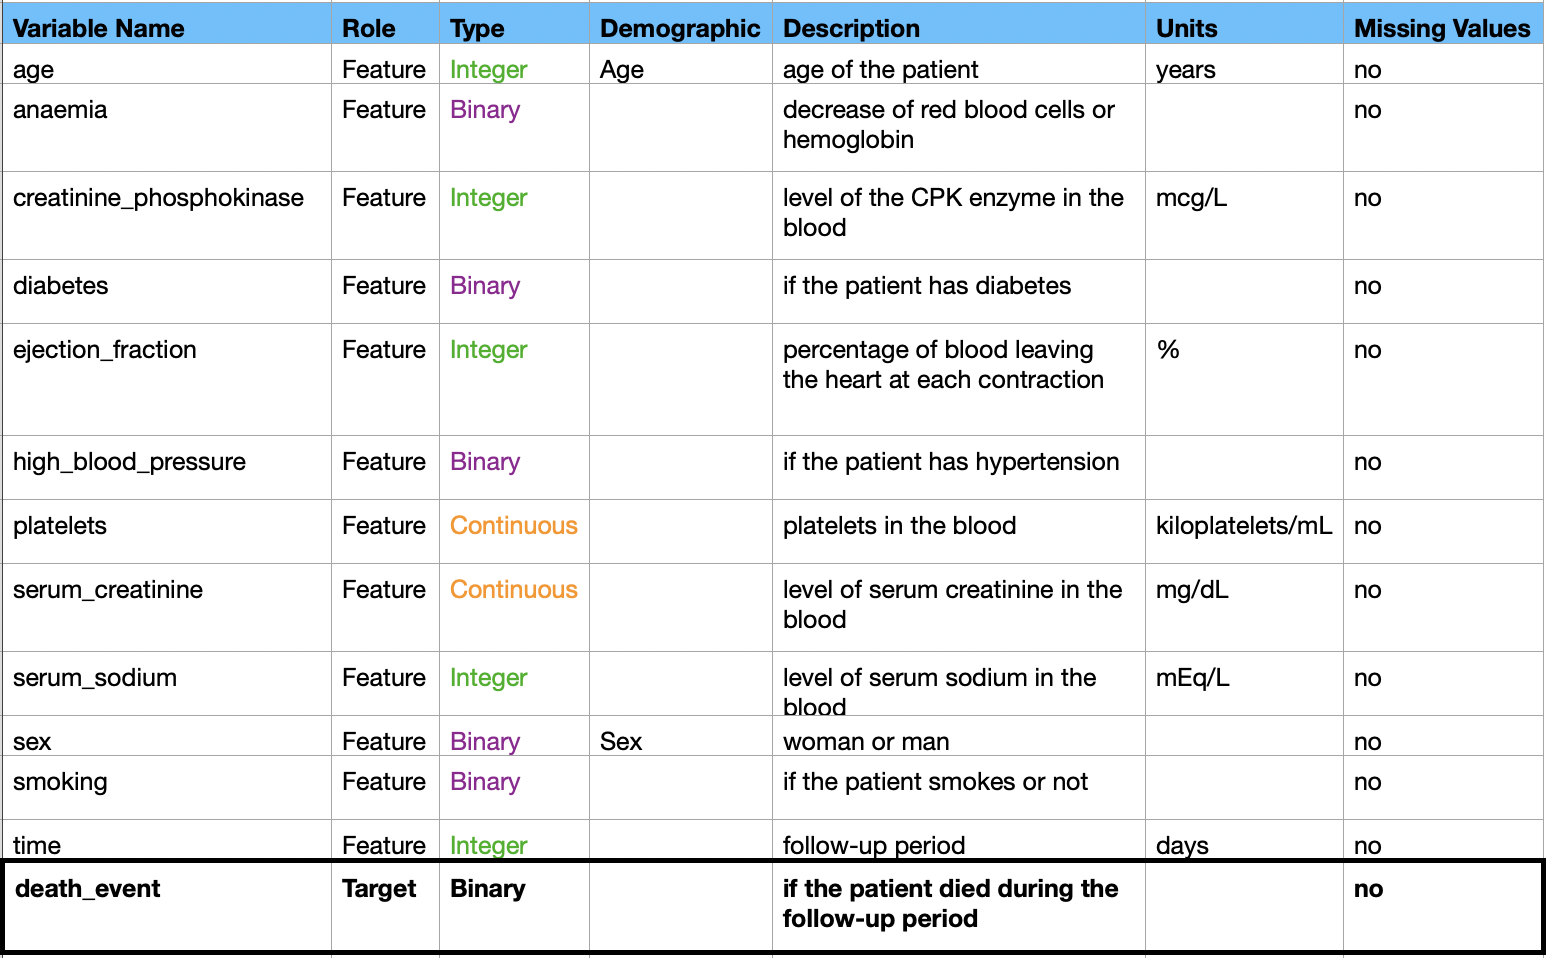

# 1) Import Data and Libraries

In [121]:
# Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import plot_tree

In [122]:
# Import Data:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# 2) EDA Inspect and Prepare Data

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [124]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [125]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [126]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

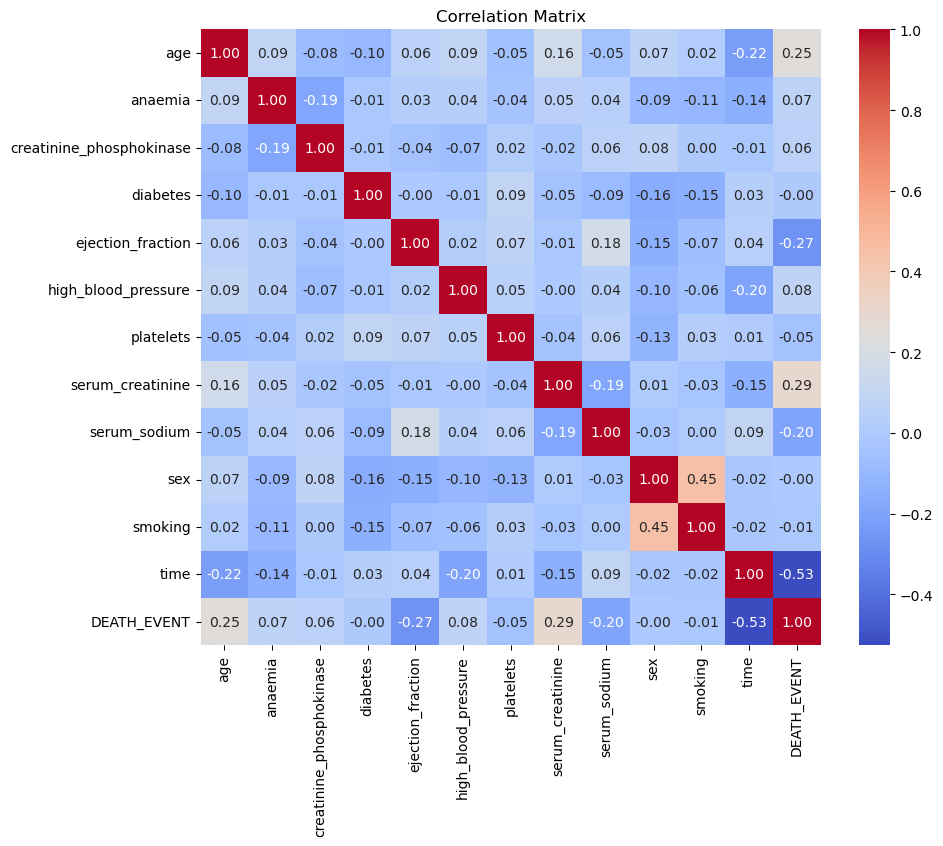

In [127]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

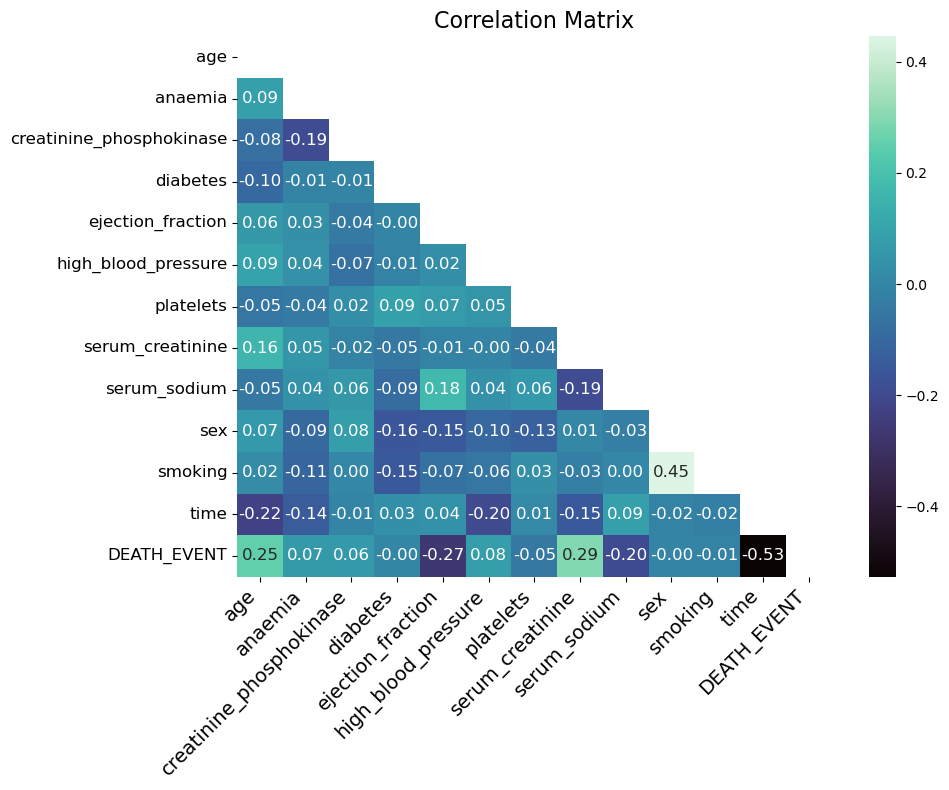

In [128]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix with the upper triangle masked
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", mask=mask, annot_kws={"fontsize": 12})
plt.title("Correlation Matrix", fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.savefig(fname="corrmat.png", format="png", transparent=True)
plt.show()

<Axes: >

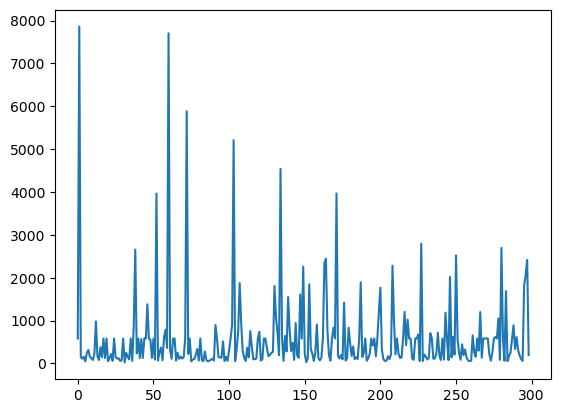

In [129]:
df["creatinine_phosphokinase"].plot()

<Axes: ylabel='Frequency'>

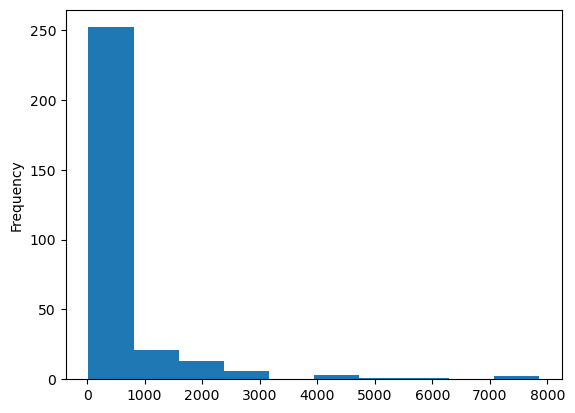

In [130]:
df["creatinine_phosphokinase"].plot(kind="hist")

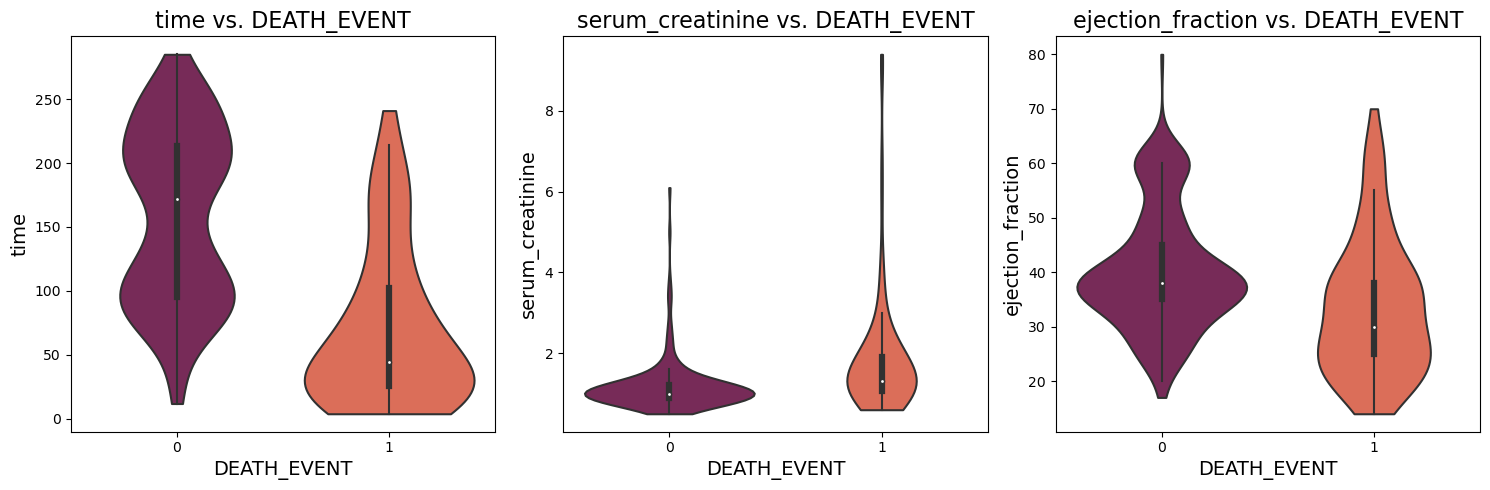

In [131]:
# Assuming 'df' is your DataFrame
variables_to_plot = ["time", "serum_creatinine", "ejection_fraction"]

plt.figure(figsize=(15, 5))  # Set the figure size for horizontal plots

for i, col in enumerate(variables_to_plot):
    plt.subplot(1, len(variables_to_plot), i + 1)  # Create subplots in a horizontal row
    sns.violinplot(data=df, y=col, x="DEATH_EVENT", cut=0, palette="rocket")
    plt.title(f"{col} vs. DEATH_EVENT", fontsize=16)  # Increase title font size
    plt.xlabel("DEATH_EVENT", fontsize=14)  # Increase x-axis label font size
    plt.ylabel(col, fontsize=14)  # Increase y-axis label font size

plt.savefig(fname="violin.png", format="png", transparent=True)
plt.tight_layout()
plt.show()

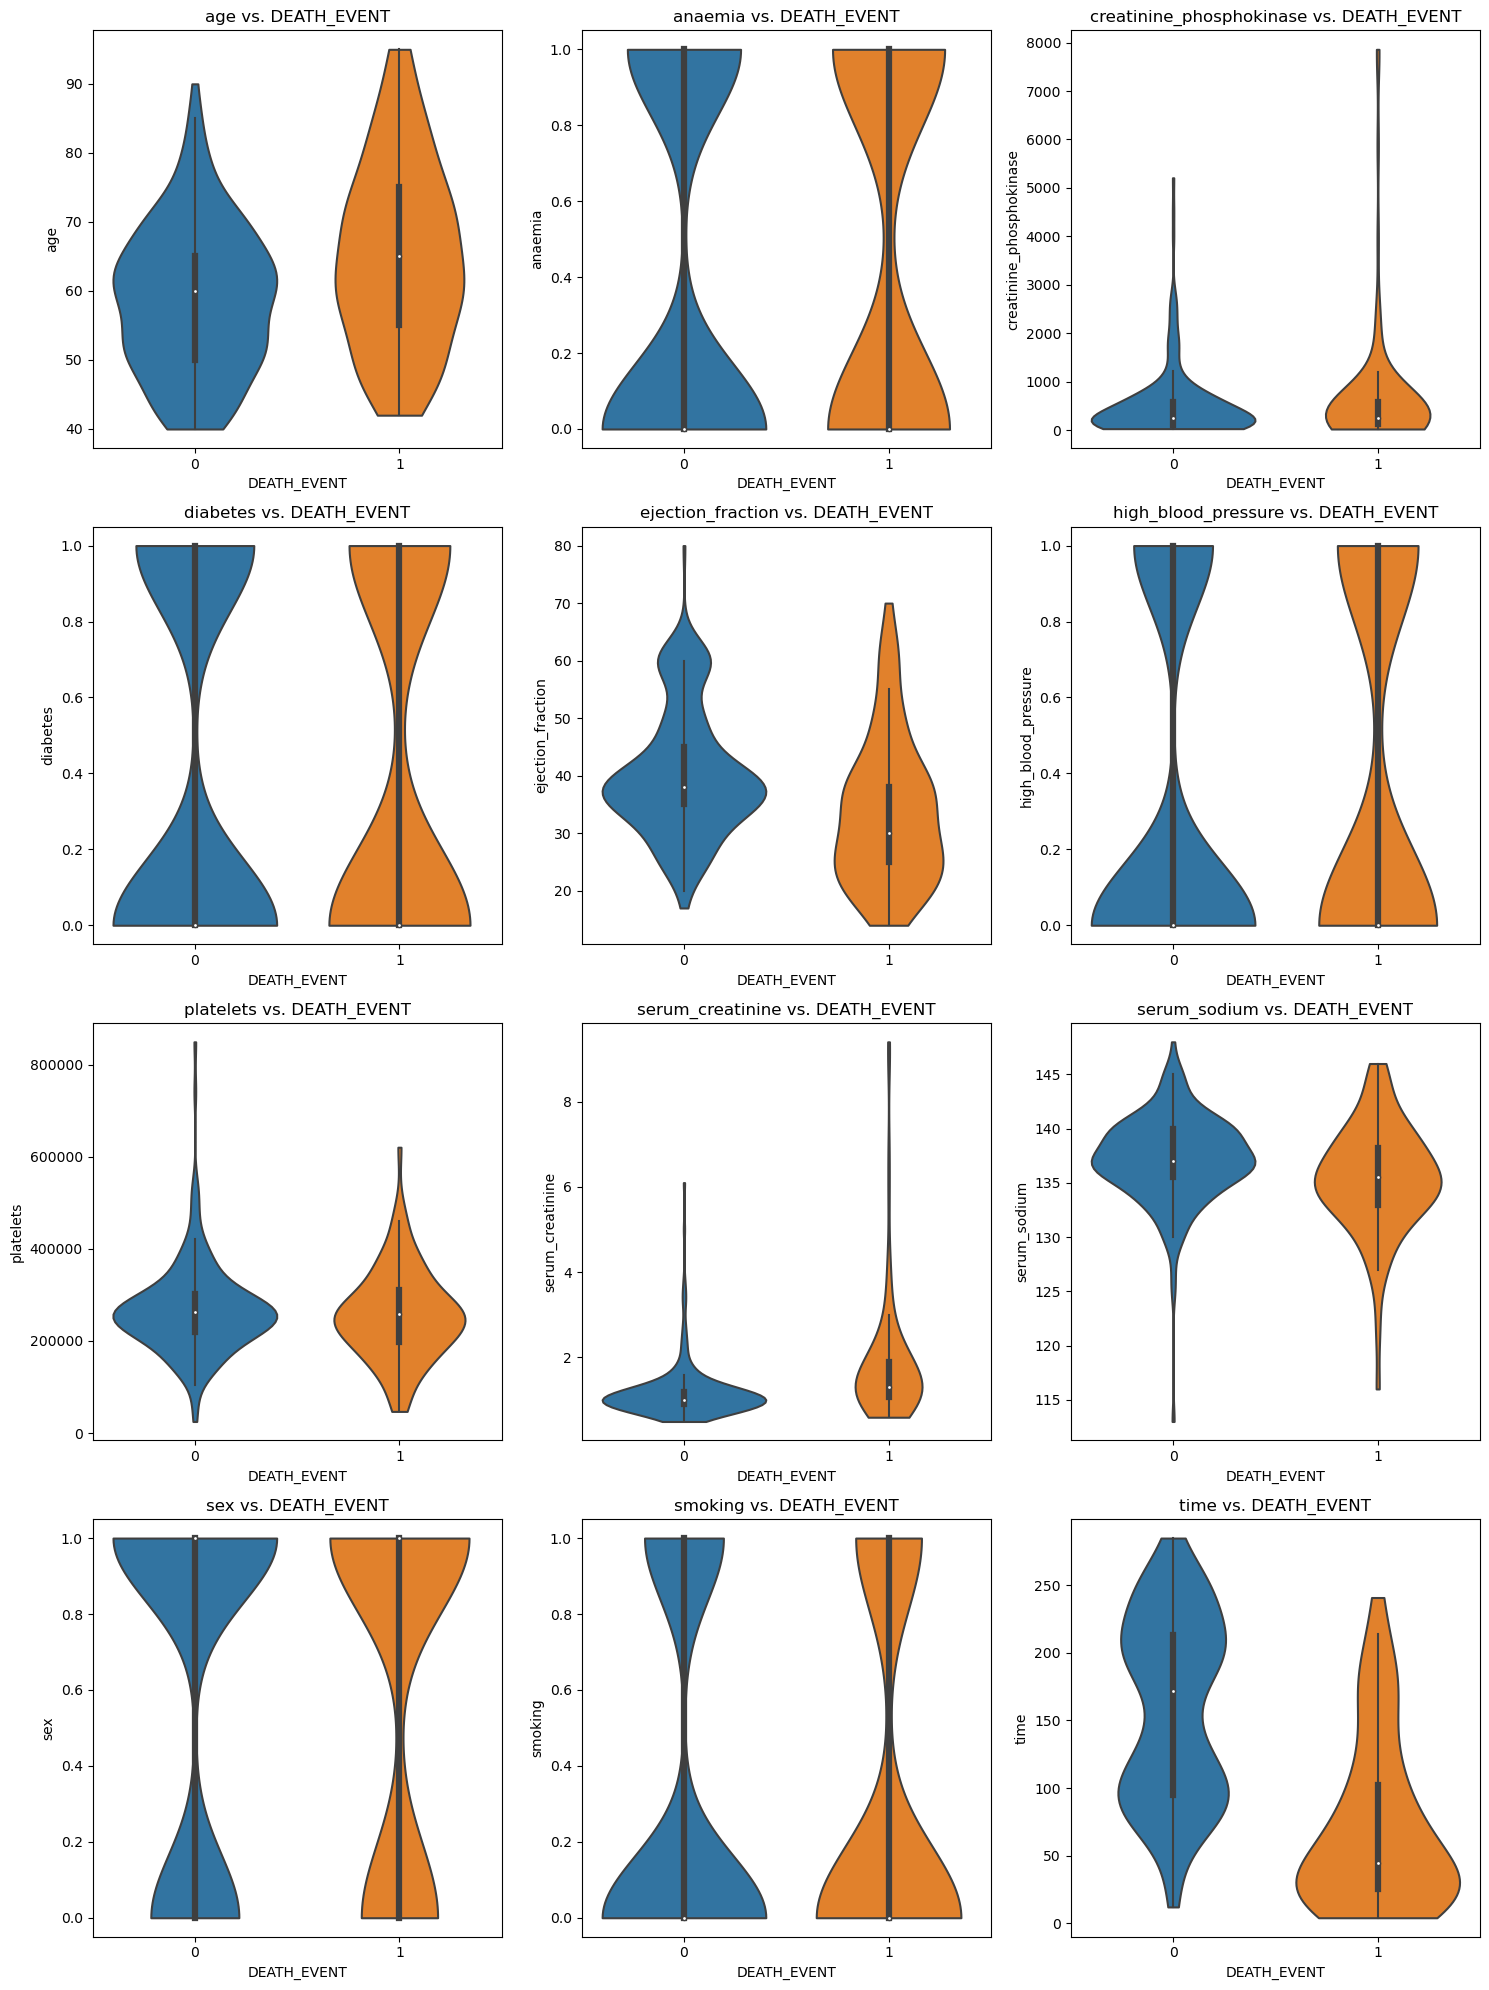

In [132]:
# Assuming 'df' is your DataFrame
num_features = len(df.columns) - 1  # Excluding 'DEATH_EVENT'
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 5 * num_rows))  # Set the figure size dynamically

for i, col in enumerate(df.columns):
    if col != 'DEATH_EVENT':
        plt.subplot(num_rows, 3, i + 1)  # Create subplots in a dynamic grid
        sns.violinplot(data=df, x="DEATH_EVENT", y=col, cut=0)
        plt.title(f"{col} vs. DEATH_EVENT")

plt.tight_layout()
plt.show()

<Axes: >

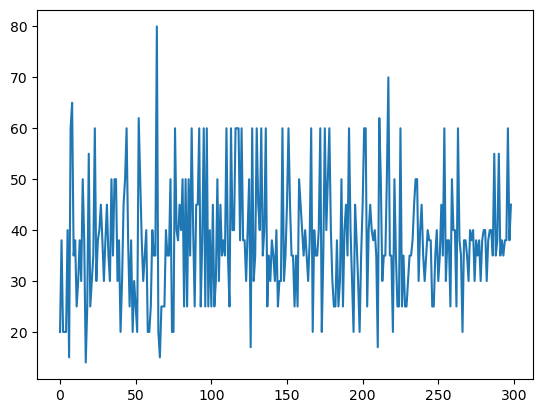

In [133]:
df["ejection_fraction"].plot()

<Axes: >

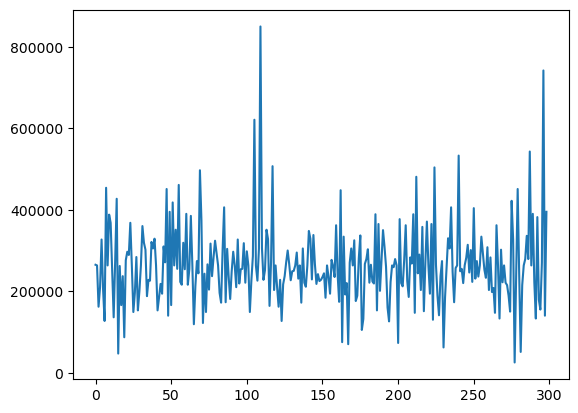

In [134]:
df["platelets"].plot()

<Axes: >

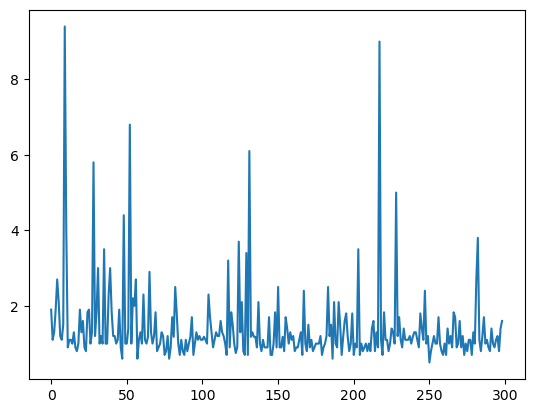

In [135]:
df["serum_creatinine"].plot()

<Axes: ylabel='Frequency'>

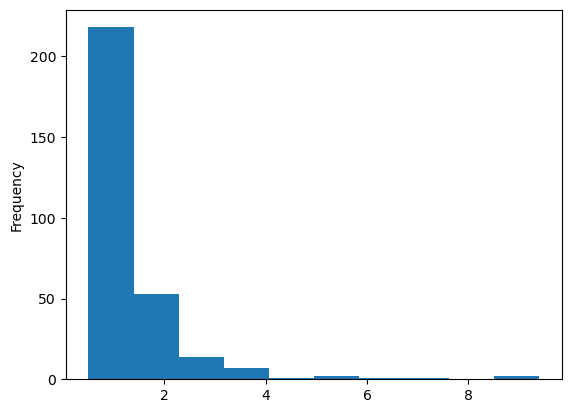

In [136]:
df["serum_creatinine"].plot(kind="hist")

In [137]:
# Isolate target variable and features
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [138]:
columns_to_keep = ["DEATH_EVENT", "ejection_fraction", "serum_creatinine"]

df2 = df[columns_to_keep].copy()

X2 = df2.drop(["DEATH_EVENT"], axis=1)
y2 = df2["DEATH_EVENT"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2) #, random_state=42)

In [139]:
binary_categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

def to_boolean(df):
    df[binary_categorical_cols] = df[binary_categorical_cols].astype(bool)
    return df

to_boolean(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,1
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,1
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,1
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,1
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,61,True,38,True,155000.00,1.1,143,True,True,270,0
295,55.0,False,1820,False,38,False,270000.00,1.2,139,False,False,271,0
296,45.0,False,2060,True,60,False,742000.00,0.8,138,False,False,278,0
297,45.0,False,2413,False,38,False,140000.00,1.4,140,True,True,280,0


In [140]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,1
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,1
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,1
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,1
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,61,True,38,True,155000.00,1.1,143,True,True,270,0
295,55.0,False,1820,False,38,False,270000.00,1.2,139,False,False,271,0
296,45.0,False,2060,True,60,False,742000.00,0.8,138,False,False,278,0
297,45.0,False,2413,False,38,False,140000.00,1.4,140,True,True,280,0


In [141]:
# Preprocessing steps for numerical data
num_transformer = make_pipeline(StandardScaler())

# Define the selector for numerical columns
num_features = make_column_selector(dtype_include="number")

# Put the pipeline together
preprocessor = make_column_transformer(
    (num_transformer, num_features)
)

# 3) Test Models

## 3.1 Including all features

In [142]:
classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
]

In [143]:
for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="recall")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000) is 0.618095238095238

Train score for DecisionTreeClassifier() is 0.6495238095238095

Train score for RandomForestClassifier() is 0.7466666666666667

Train score for SVC() is 0.5904761904761904

Train score for KNeighborsClassifier() is 0.28



In [144]:
for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="recall")
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    pre = precision_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)

    print(f"Model: {classifier}")
    print(f"Best Hyperparameters: {grid.best_params_}")
    print(f"Train score for {classifier} for recall {grid.best_score_}")
    print(f"For the full training data the scores are Accuracy: {acc}, Precision: {pre}, Recall: {rec}")
    print("")
    print("")

Model: LogisticRegression(max_iter=1000)
Best Hyperparameters: {}
Train score for LogisticRegression(max_iter=1000) for recall 0.618095238095238
For the full training data the scores are Accuracy: 0.8661087866108786, Precision: 0.8095238095238095, Recall: 0.7183098591549296


Model: DecisionTreeClassifier()
Best Hyperparameters: {}
Train score for DecisionTreeClassifier() for recall 0.6209523809523809
For the full training data the scores are Accuracy: 1.0, Precision: 1.0, Recall: 1.0


Model: RandomForestClassifier()
Best Hyperparameters: {}
Train score for RandomForestClassifier() for recall 0.7885714285714286
For the full training data the scores are Accuracy: 1.0, Precision: 1.0, Recall: 1.0


Model: SVC()
Best Hyperparameters: {}
Train score for SVC() for recall 0.5904761904761904
For the full training data the scores are Accuracy: 0.9288702928870293, Precision: 0.9354838709677419, Recall: 0.8169014084507042


Model: KNeighborsClassifier()
Best Hyperparameters: {}
Train score for 

## 3.2 Only including 2 features

In [145]:
for classifier in classifiers:
    pipe2 = make_pipeline(preprocessor, classifier)
    grid2 = GridSearchCV(estimator=pipe2, param_grid={}, cv=5, scoring="recall")
    grid2.fit(X2_train, y2_train)
    y2_pred = grid2.predict(X2_train)
    acc2 = accuracy_score(y2_train, y2_pred)
    pre2 = precision_score(y2_train, y2_pred)
    rec2 = recall_score(y2_train, y2_pred)

    print(f"Model: {classifier}")
    print(f"Best Hyperparameters: {grid2.best_params_}")
    print(f"Train score for {classifier} for recall {grid2.best_score_}")
    print(f"For the full training data the scores are Accuracy: {acc2}, Precision: {pre2}, Recall: {rec2}")
    print("")
    print("")

Model: LogisticRegression(max_iter=1000)
Best Hyperparameters: {}
Train score for LogisticRegression(max_iter=1000) for recall 0.3142857142857142
For the full training data the scores are Accuracy: 0.7656903765690377, Precision: 0.7297297297297297, Recall: 0.3698630136986301


Model: DecisionTreeClassifier()
Best Hyperparameters: {}
Train score for DecisionTreeClassifier() for recall 0.4923809523809523
For the full training data the scores are Accuracy: 0.9079497907949791, Precision: 0.8923076923076924, Recall: 0.7945205479452054


Model: RandomForestClassifier()
Best Hyperparameters: {}
Train score for RandomForestClassifier() for recall 0.6028571428571429
For the full training data the scores are Accuracy: 0.9079497907949791, Precision: 0.8805970149253731, Recall: 0.8082191780821918


Model: SVC()
Best Hyperparameters: {}
Train score for SVC() for recall 0.38190476190476186
For the full training data the scores are Accuracy: 0.7824267782426778, Precision: 0.7441860465116279, Recall: 

# 4) Tuning Best Model

In [146]:
rfb = RandomForestClassifier()

pipe_rfb = make_pipeline(preprocessor, rfb)

grid_rfb = GridSearchCV(pipe_rfb, param_grid={}, cv=10, scoring="recall")

grid_rfb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x168d8ccd0>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={}, scoring='recall')

In [147]:
y_predb = grid_rfb.predict(X_train)
accb = accuracy_score(y_train, y_predb)
preb = precision_score(y_train, y_predb)
recb = recall_score(y_train, y_predb)

# Calculate F1 score
f1b = f1_score(y_train, y_predb)

# Calculate AUC-ROC score
y_pred_prob_b = grid_rfb.predict_proba(X_train)[:, 1]  # Get the predicted probabilities for class 1
auc_rocb = roc_auc_score(y_train, y_pred_prob_b)

print("Best score: ", grid_rfb.best_score_)
print("Best params: ", grid_rfb.best_params_)

print(f"For the full training data, the scores are:\n Accuracy: {accb}, Precision: {preb}, Recall: {recb}, F1 Score: {f1b}, AUC-ROC Score: {auc_rocb}")

Best score:  0.7749999999999999
Best params:  {}
For the full training data, the scores are:
 Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0, AUC-ROC Score: 1.0


In [148]:
best_model_nt = grid_rfb.best_estimator_
best_model_nt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1687763d0>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [149]:
# Parameter grid for RandomForestClassifier
param_grid_rf = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],     # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 2, 5, 10, 20],  # Maximum depth of the trees
    'randomforestclassifier__min_samples_split': [2, 3, 5, 10], # Minimum samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 10],  # Minimum samples required at leaf nodes
}

In [150]:
rf = RandomForestClassifier()

pipe_rf = make_pipeline(preprocessor, rf)

grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=10, scoring="recall")

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x168d8ccd0>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 2, 5, 10,
                                                               20],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4,
                                                                      10],
                         'randomforestclassifier__min_samples_split': [2, 3, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [10, 50, 100,
                                                                  200]},
             scoring='recall')

In [151]:
print("Best score: ", grid_rf.best_score_)
print("Best params: ", grid_rf.best_params_)

y_pred = grid_rf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
pre = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred)

# Calculate F1 score
f1 = f1_score(y_train, y_pred)

# Calculate AUC-ROC score
y_pred_prob = grid_rf.predict_proba(X_train)[:, 1]  # Get the predicted probabilities for class 1
auc_roc = roc_auc_score(y_train, y_pred_prob)

print(f"For the full training data, the scores are:\n Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1 Score: {f1}, AUC-ROC Score: {auc_roc}")

Best score:  0.8196428571428573
Best params:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 10}
For the full training data, the scores are:
 Accuracy: 0.9497907949790795, Precision: 0.9538461538461539, Recall: 0.8732394366197183, F1 Score: 0.9117647058823529, AUC-ROC Score: 0.9882629107981221


In [152]:
# Access the best estimator (Pipeline)
best_pipeline = grid_rf.best_estimator_

# Access the Random Forest model inside the pipeline
best_rf_model = best_pipeline.named_steps['randomforestclassifier']

# Access feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                     Feature  Importance
11                      time    0.370889
7           serum_creatinine    0.219995
4          ejection_fraction    0.133719
0                        age    0.078463
2   creatinine_phosphokinase    0.071522
6                  platelets    0.062734
8               serum_sodium    0.036214
9                        sex    0.012638
1                    anaemia    0.006811
10                   smoking    0.005782
5        high_blood_pressure    0.000884
3                   diabetes    0.000349


In [153]:
best_model = grid_rf.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168ef2b90>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=4,
                                        n_estimators=10))])

## 4.2) Second Model

In [154]:
rf = RandomForestClassifier()

pipe_rf2 = make_pipeline(preprocessor, rf)

grid_rf2 = GridSearchCV(pipe_rf2, param_grid=param_grid_rf, cv=10, scoring="recall")

grid_rf2.fit(X2_train, y2_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x168d8ccd0>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 2, 5, 10,
                                                               20],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4,
                                                                      10],
                         'randomforestclassifier__min_samples_split': [2, 3, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [10, 50, 100,
                                                                  200]},
             scoring='recall')

In [155]:
print("Best score: ", grid_rf2.best_score_)
print("Best params: ", grid_rf2.best_params_)

y2_pred = grid_rf2.predict(X_train)
acc2 = accuracy_score(y2_train, y2_pred)
pre2 = precision_score(y2_train, y2_pred)
rec2 = recall_score(y2_train, y2_pred)

# Calculate F1 score
f12 = f1_score(y2_train, y2_pred)

# Calculate AUC-ROC score
y2_pred_prob = grid_rf2.predict_proba(X2_train)[:, 1]  # Get the predicted probabilities for class 1
auc_roc2 = roc_auc_score(y2_train, y2_pred_prob)

print(f"For the full training data, the scores are:\n Accuracy: {acc2}, Precision: {pre2}, Recall: {rec2}, F1 Score: {f12}, AUC-ROC Score: {auc_roc2}")

Best score:  0.6482142857142856
Best params:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 100}
For the full training data, the scores are:
 Accuracy: 0.6276150627615062, Precision: 0.38235294117647056, Recall: 0.3561643835616438, F1 Score: 0.36879432624113473, AUC-ROC Score: 0.9661660339990098


In [156]:
# Access the best estimator (Pipeline)
best_pipeline2 = grid_rf2.best_estimator_

# Access the Random Forest model inside the pipeline
best_rf_model2 = best_pipeline2.named_steps['randomforestclassifier']

# Access feature importances
feature_importances2 = best_rf_model2.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df2 = pd.DataFrame({'Feature': X2_train.columns, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)

             Feature  Importance
1   serum_creatinine    0.615107
0  ejection_fraction    0.384893


In [157]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_true = y_test.copy()
y_pred = dummy.predict(X_test)
baseline = accuracy_score(y_true, y_pred)
print(f"The baseline to beat is {baseline}")

The baseline to beat is 0.5833333333333334


## Confusion Matrixes

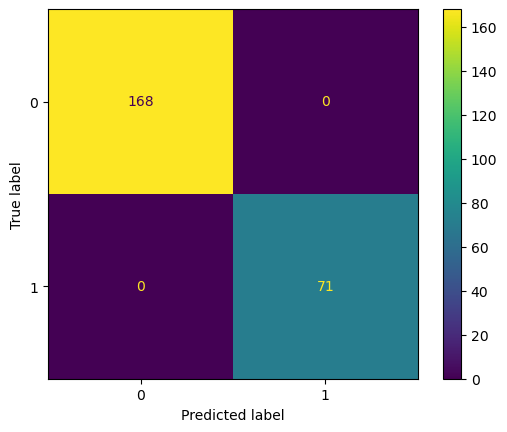

In [159]:
y_predb = grid_rfb.predict(X_train)
cm = confusion_matrix(y_train, y_predb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

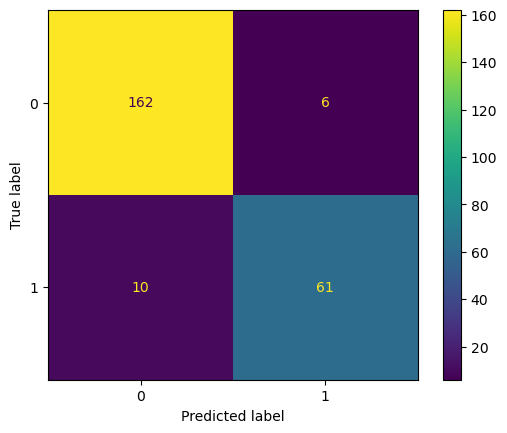

In [160]:
y_pred = grid_rf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

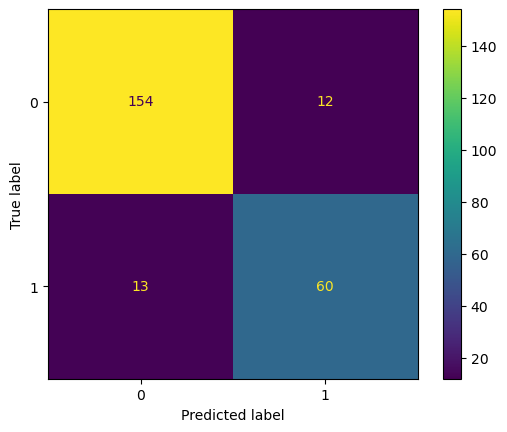

In [161]:
y2_pred = grid_rf2.predict(X2_train)
cm = confusion_matrix(y2_train, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

# 5) Final Evaluation

In [162]:
y_pred_f_nt = best_model_nt.predict(X_test)

accfn = accuracy_score(y_test, y_pred_f_nt)
prefn = precision_score(y_test, y_pred_f_nt)
recfn = recall_score(y_test, y_pred_f_nt)

# Calculate F1 score
f1fn = f1_score(y_test, y_pred_f_nt)

# Calculate AUC-ROC score
y_pred_prob_f_nt = best_model_nt.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for class 1
auc_rocfn = roc_auc_score(y_test, y_pred_prob_f_nt)

print(f"The model score on test data are:\n Accuracy: {accfn}, Precision: {prefn}, Recall: {recfn}, F1 Score: {f1fn}, AUC-ROC Score: {auc_rocfn}")

The model score on test data are:
 Accuracy: 0.7333333333333333, Precision: 0.8, Recall: 0.48, F1 Score: 0.6, AUC-ROC Score: 0.8462857142857143


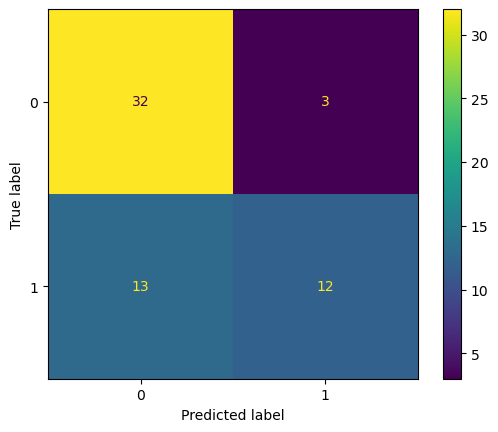

In [163]:
cm = confusion_matrix(y_test, y_pred_f_nt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [164]:
y_pred_f = best_model.predict(X_test)

accf = accuracy_score(y_test, y_pred_f)
pref = precision_score(y_test, y_pred_f)
recf = recall_score(y_test, y_pred_f)

# Calculate F1 score
f1f = f1_score(y_test, y_pred_f)

# Calculate AUC-ROC score
y_pred_prob_f = best_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for class 1
auc_rocf = roc_auc_score(y_test, y_pred_prob_f)

print(f"The model score on test data are:\n Accuracy: {accf}, Precision: {pref}, Recall: {recf}, F1 Score: {f1f}, AUC-ROC Score: {auc_rocf}")

The model score on test data are:
 Accuracy: 0.7166666666666667, Precision: 0.75, Recall: 0.48, F1 Score: 0.5853658536585366, AUC-ROC Score: 0.8228571428571428


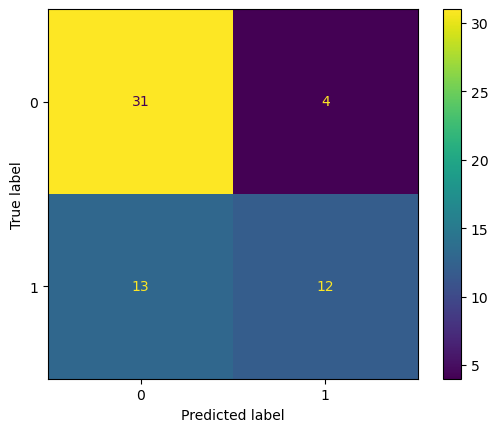

In [168]:
cm = confusion_matrix(y_test, y_pred_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.savefig(fname="matrix_final.png", format="png", transparent=True)
plt.show()

In [166]:
y_test.value_counts(normalize=True)

0    0.583333
1    0.416667
Name: DEATH_EVENT, dtype: float64

In [167]:
y_train.value_counts(normalize=True)

0    0.702929
1    0.297071
Name: DEATH_EVENT, dtype: float64